<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template
* Notebook completed by Adam Lang as a fundamentals review of PyTorch from the great Daniel Bourke's PyTorch for Deep Learning bootcamp.



In [1]:
# Import necessary libraries
import torch
from torch import nn ## neural network module
import matplotlib.pyplot as plt
%matplotlib inline


## always check the pytorch version
print(f"PyTorch current version: {torch.__version__}")

PyTorch current version: 2.5.1+cu124


In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

## print current device
print(f"Current device is set to: {device}")

Current device is set to: cuda


## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [47]:
# Create the data parameters
weight = 0.3
bias = 0.9

# Make X and y using linear regression feature
start = 0.0
end = 1.0
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [48]:
## check ndim of tensors --> we will need to unsqueeze it from 1 dimension for matrix multiplication
X.shape, X.ndim

(torch.Size([100, 1]), 2)

Summary
* Now we have a 2 dimensional tensor of 100 variables.

In [49]:
# Split the data into training and testing
train_split = int(0.8 * len(X)) ## this is the split we will use
train_split

80

In [50]:
## set the train/test split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

## len of train and test data
print(f"Len of X_train: {len(X_train)}")
print(f"Len of y_train: {len(y_train)}")
print(f"Len of X_test: {len(X_test)}")
print(f"Len of y_test: {len(y_test)}")

Len of X_train: 80
Len of y_train: 80
Len of X_test: 20
Len of y_test: 20


In [51]:
# Plot the training and testing data

## we can build a function to plot the data
def plot_data(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=None):

  """
  This function plots train data, test data and compares predictions.
  """
  plt.figure(figsize=(12,8))

  ## plot train data in blue
  plt.scatter(train_data, train_labels, c="b", s=5, label="Train Data")

  ## plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=5, label="Test Data")

  ## look for preds
  if predictions is not None:
    # plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=5, label="Predictions")

  ## show legend, labels
  plt.title("Scatter plot of Train and Test Data vs. Predictions")
  plt.legend(prop={"size": 16}, loc="upper left");
  plt.xlabel("X variable")
  plt.ylabel("y variable")
  plt.show();

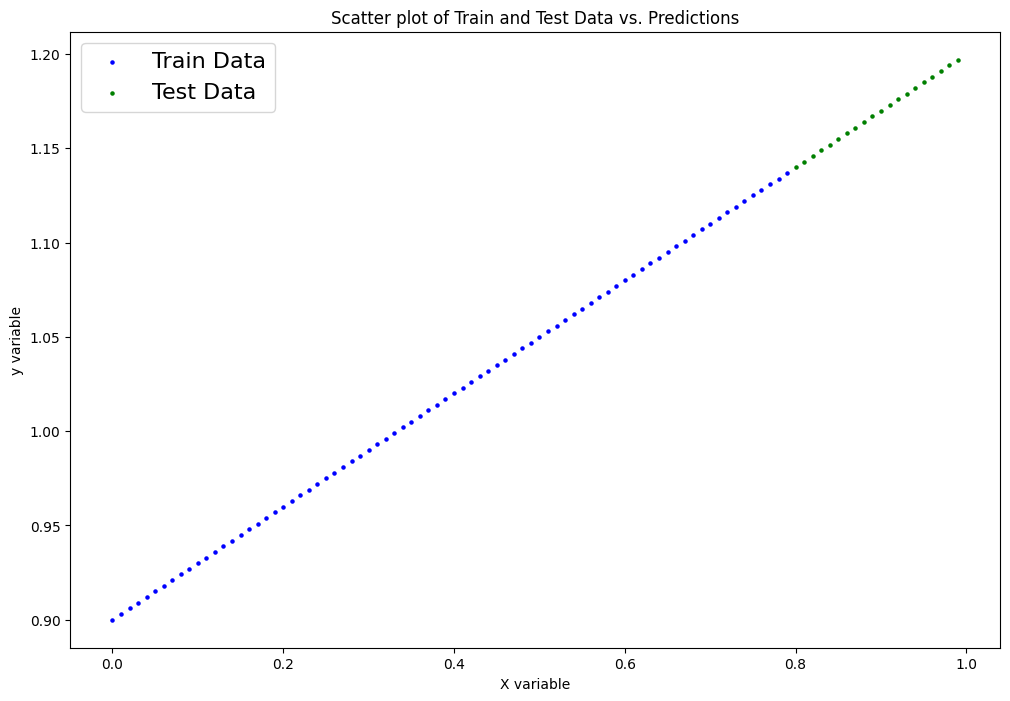

In [52]:
## test function
plot_data()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [53]:
# Create PyTorch linear regression model by subclassing nn.Module
import torch
from torch import nn

## linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                                 requires_grad=True,
                                                 dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  ## forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias ## linear reg equation

In [54]:
## random seed
torch.manual_seed(42)

# Instantiate the model and put it to the target device
model_0 = LinearRegressionModel()

## check state dict
print(f"Model state dict: {model_0.state_dict()}")

## send to target device
model_0.to(device)

## check device of model
device = next(model_0.parameters()).device
print(f"Device of model: {device}")

Model state dict: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Device of model: cuda:0


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [55]:
## X_test, y_test
X_test, y_test

(tensor([[0.8000],
         [0.8100],
         [0.8200],
         [0.8300],
         [0.8400],
         [0.8500],
         [0.8600],
         [0.8700],
         [0.8800],
         [0.8900],
         [0.9000],
         [0.9100],
         [0.9200],
         [0.9300],
         [0.9400],
         [0.9500],
         [0.9600],
         [0.9700],
         [0.9800],
         [0.9900]]),
 tensor([[1.1400],
         [1.1430],
         [1.1460],
         [1.1490],
         [1.1520],
         [1.1550],
         [1.1580],
         [1.1610],
         [1.1640],
         [1.1670],
         [1.1700],
         [1.1730],
         [1.1760],
         [1.1790],
         [1.1820],
         [1.1850],
         [1.1880],
         [1.1910],
         [1.1940],
         [1.1970]]))

In [56]:
# Create the loss function and optimizer

## 1. loss function for linear regression --> L1Loss() (e.g. MAE)
loss_fn = nn.L1Loss()

## 2. optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [57]:
# Training loop
## setmanual seed
torch.manual_seed(42)


# Train model for 300 epochs
epochs = 300


# Send data to target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# ## experiment tracking
# epoch_count = []
# loss_values = []
# test_loss_values = []


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()


  # 1. Forward pass
  y_pred = model_0(X_train)


  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)


  # 3. Zero gradients
  optimizer.zero_grad()


  # 4. Backpropagation
  loss.backward()


  # 5. Step the optimizer
  optimizer.step()



  # Put model in evaluation mode and setup inference context
  model_0.eval()
  with torch.inference_mode():
    ## if you want to append the tracking values
    # epoch_count.append(epoch)
    # loss_values.append(loss)
    # test_loss_values.append(test_loss)

      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate test loss
      test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 20 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.7566978931427002 | Test Loss: 0.7248174548149109
Epoch: 20 | Loss: 0.5254928469657898 | Test Loss: 0.4541124403476715
Epoch: 40 | Loss: 0.2942880392074585 | Test Loss: 0.18340764939785004
Epoch: 60 | Loss: 0.07658576965332031 | Test Loss: 0.07274086028337479
Epoch: 80 | Loss: 0.05255373939871788 | Test Loss: 0.11581540107727051
Epoch: 100 | Loss: 0.04554273188114166 | Test Loss: 0.10467890650033951
Epoch: 120 | Loss: 0.038688670843839645 | Test Loss: 0.08938358724117279
Epoch: 140 | Loss: 0.03183453530073166 | Test Loss: 0.07408786565065384
Epoch: 160 | Loss: 0.024982361122965813 | Test Loss: 0.0581042543053627
Epoch: 180 | Loss: 0.018130186945199966 | Test Loss: 0.04212063178420067
Epoch: 200 | Loss: 0.011278990656137466 | Test Loss: 0.02579306997358799
Epoch: 220 | Loss: 0.004429381340742111 | Test Loss: 0.009467745199799538
Epoch: 240 | Loss: 0.00370177929289639 | Test Loss: 0.006489444058388472
Epoch: 260 | Loss: 0.00370177929289639 | Test Loss: 0.006489444058388

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [58]:
# Make predictions with the model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

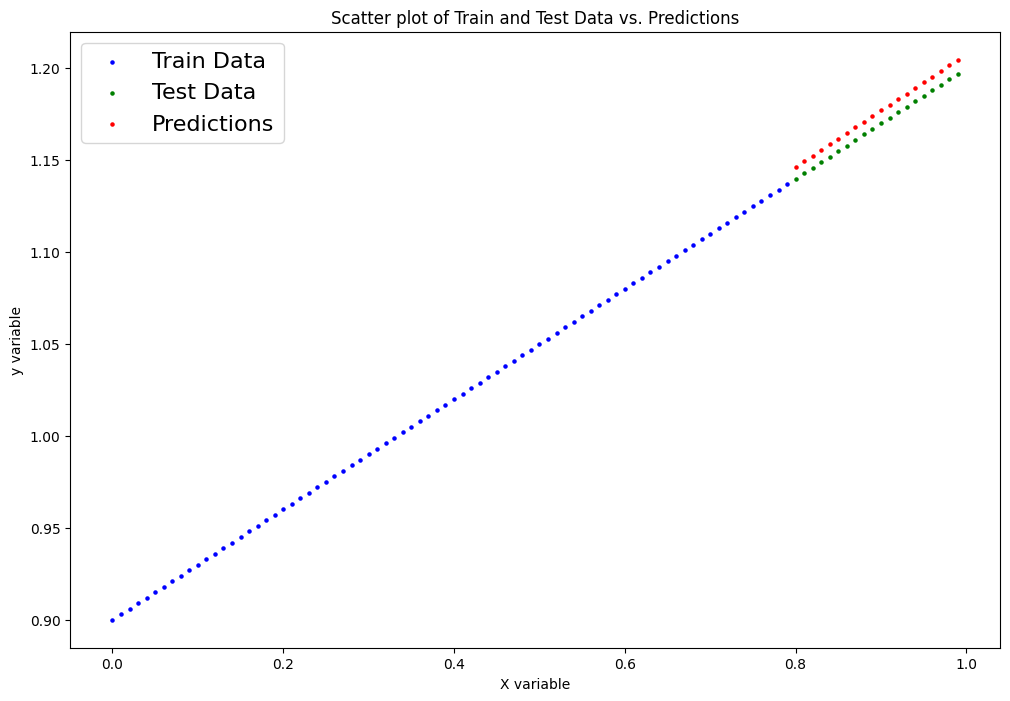

In [61]:
# Plot the predictions (these may need to be on a specific device)
plot_data(predictions=y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [62]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models_test")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_linear_regression_test_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving PyTorch model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving PyTorch model to: models_test/pytorch_linear_regression_test_model.pth


In [65]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_test_model = LinearRegressionModel()

""
## load saved dict
loaded_test_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

## put this on the device
loaded_test_model.to(device)

<ipython-input-65-db25b4155395>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_test_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModel()

In [67]:
# Make predictions with loaded model and compare them to the previous
loaded_test_model.eval()
with torch.inference_mode():
  loaded_test_model_preds = loaded_test_model(X_test) ## forward pass using loaded model


## compare preds to actual
y_preds == loaded_test_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Summary
* We can see the model was able to predict results 100% accurate with the actual.